## Forecasting the popularity of online news articles.

### Problem Description

Performing a regression analysis on the popularity of online news articles using a range of attributes, including word count, images, videos, keywords, and sentiment scores. The dataset employed originates from the Online News Popularity Data Set accessible via the UCI Machine Learning Repository.

### Data Description

* url:                           URL of the article
* timedelta:                     Days between the article publication and the dataset acquisition
* n_tokens_title:                Number of words in the title
* n_tokens_content:              Number of words in the content
* n_unique_tokens:               Rate of unique words in the content
* n_non_stop_words:              Rate of non-stop words in the content
* n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
* num_hrefs:                     Number of links
* num_self_hrefs:                Number of links to other articles published by Mashable
* num_imgs:                      Number of images
* num_videos:                    Number of videos
* average_token_length:          Average length of the words in the content
* num_keywords:                  Number of keywords in the metadata
* data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
* data_channel_is_entertainment: Is data channel 'Entertainment'?
* data_channel_is_bus:           Is data channel 'Business'?
* data_channel_is_socmed:        Is data channel 'Social Media'?
* data_channel_is_tech:          Is data channel 'Tech'?
* data_channel_is_world:         Is data channel 'World'?
* kw_min_min:                    Worst keyword (min. shares)
* kw_max_min:                    Worst keyword (max. shares)
* kw_avg_min:                    Worst keyword (avg. shares)
* kw_min_max:                    Best keyword (min. shares)
* kw_max_max:                    Best keyword (max. shares)
* kw_avg_max:                    Best keyword (avg. shares)
* kw_min_avg:                    Avg. keyword (min. shares)
* kw_max_avg:                    Avg. keyword (max. shares)
* kw_avg_avg:                    Avg. keyword (avg. shares)
* self_reference_min_shares:     Min. shares of referenced articles in Mashable
* self_reference_max_shares:     Max. shares of referenced articles in Mashable
* self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
* weekday_is_monday:             Was the article published on a Monday?
* weekday_is_tuesday:            Was the article published on a Tuesday?
* weekday_is_wednesday:          Was the article published on a Wednesday?
* weekday_is_thursday:           Was the article published on a Thursday?
* weekday_is_friday:             Was the article published on a Friday?
* weekday_is_saturday:           Was the article published on a Saturday?
* weekday_is_sunday:             Was the article published on a Sunday?
* is_weekend:                    Was the article published on the weekend?
* LDA_00:                        Closeness to LDA topic 0
* LDA_01:                        Closeness to LDA topic 1
* LDA_02:                        Closeness to LDA topic 2
* LDA_03:                        Closeness to LDA topic 3
* LDA_04:                        Closeness to LDA topic 4
* global_subjectivity:           Text subjectivity
* global_sentiment_polarity:     Text sentiment polarity
* global_rate_positive_words:    Rate of positive words in the content
* global_rate_negative_words:    Rate of negative words in the content
* rate_positive_words:           Rate of positive words among non-neutral tokens
* rate_negative_words:           Rate of negative words among non-neutral tokens
* avg_positive_polarity:         Avg. polarity of positive words
* min_positive_polarity:         Min. polarity of positive words
* max_positive_polarity:         Max. polarity of positive words
* avg_negative_polarity:         Avg. polarity of negative  words
* min_negative_polarity:         Min. polarity of negative  words
* max_negative_polarity:         Max. polarity of negative  words
* title_subjectivity:            Title subjectivity
* title_sentiment_polarity:      Title polarity
* abs_title_subjectivity:        Absolute subjectivity level
* abs_title_sentiment_polarity:  Absolute polarity level
* shares:                        Number of shares (target)

### Importing Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import klib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)

### Getting Data Ready

In [624]:
df = pd.read_csv("OnlineNewsPopularity.csv")


print(df.shape)
print("Total number of features: ", df.shape[1])
print("Total number of datapoints: ", df.shape[0])

(39644, 61)
Total number of features:  61
Total number of datapoints:  39644


In [581]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#### NULL Values

In [582]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

There are no null values.

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

It seems like the names of features have a space in front of them. Let's get rid of those spaces.

In [584]:
df.columns = df.columns.str.strip()

In [585]:
binary_features = []
for col in df.columns:
    if df[col].value_counts().shape[0] == 2:
        binary_features.append(col)
        
len(binary_features)

14

As we can see many of our columns are discrete or binary but are marked as float, So let's fix that:

The following colums are binary:

* data_channel_is_lifestyle
* data_channel_is_entertainment
* data_channel_is_bus
* data_channel_is_socmed
* data_channel_is_tech
* data_channel_is_world
* weekday_is_monday
* weekday_is_tuesday
* weekday_is_wednesday
* weekday_is_thursday
* weekday_is_friday
* weekday_is_saturday
* weekday_is_sunday
* is_weekend

In [586]:
for f in binary_features:
    df[f] = df[f].astype('bool')

The following features are discrete:

* n_tokens_title
* n_tokens_content
* num_hrefs
* num_self_hrefs
* num_imgs
* num_videos
* num_keywords
* shares

In [587]:
int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','shares']
for f in int_features:
    df[f] = df[f].astype('int64')

We should also drop non-predictive feature to avoid overfitting.

In [588]:
df = df.drop(columns=['url', 'timedelta'])

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  int64  
 1   n_tokens_content               39644 non-null  int64  
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  int64  
 6   num_self_hrefs                 39644 non-null  int64  
 7   num_imgs                       39644 non-null  int64  
 8   num_videos                     39644 non-null  int64  
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  int64  
 11  data_channel_is_lifestyle      39644 non-null  bool   
 12  data_channel_is_entertainment  39644 non-null 

## EDA &  Feature Engineering

In [590]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.15

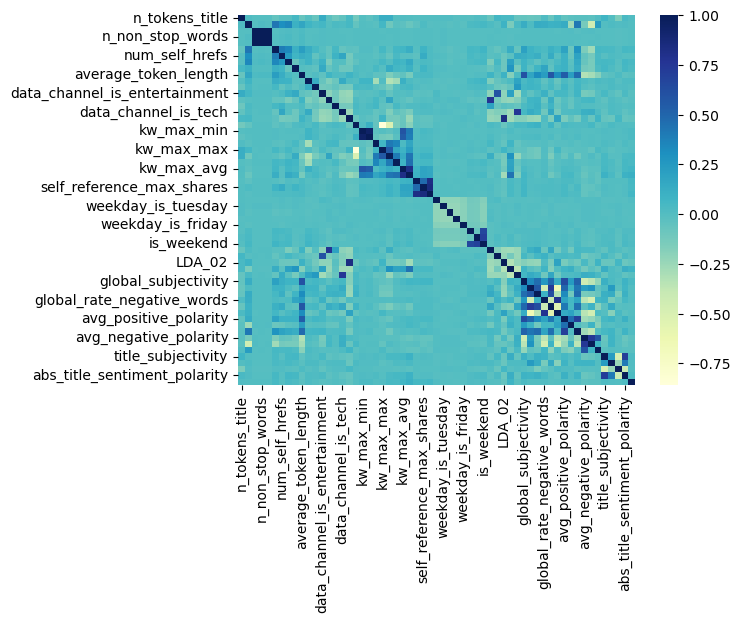

In [591]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

Let's take a look at the precentage of news published on weekend.

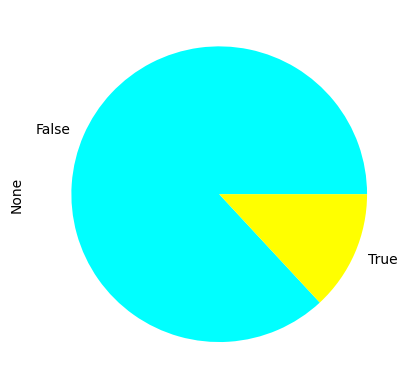

In [592]:
custom_colors = ['cyan', 'yellow']

df.groupby('is_weekend').size().plot(kind = 'pie', colors = custom_colors)
plt.show()

#### num_imgs vs shares

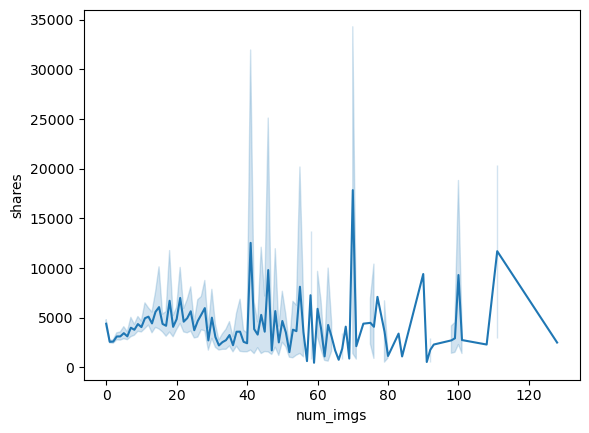

In [530]:
sns.lineplot(x='num_imgs', y='shares', data=df)
plt.show()

As the number of images in the articles increases, the number of shares also increases.

#### num_videos vs shares

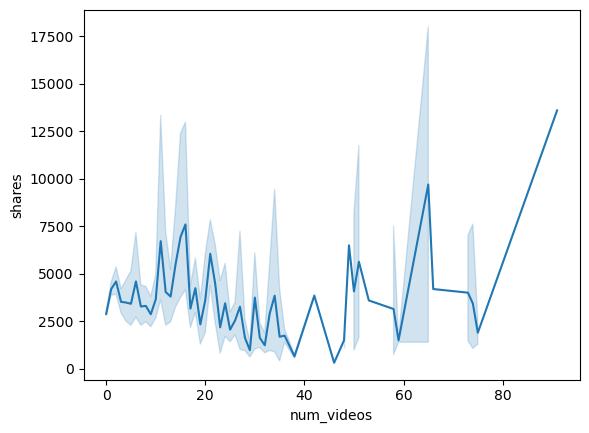

In [531]:
sns.lineplot(x='num_videos', y='shares', data=df)
plt.show()

Here we can see that with an increasing number of videos, shares also increase.

#### is_weekend

In [593]:
df.groupby("is_weekend")["shares"].mean()

is_weekend
False    3318.855140
True     3903.394412
Name: shares, dtype: float64

In [594]:
df.groupby("is_weekend")["shares"].median()

is_weekend
False    1400.0
True     1900.0
Name: shares, dtype: float64

There is significant difference in the mean popularity of articles published on weekdays versus articles published on weekends.

#### rate_positive_words, rate_negative_words vs shares

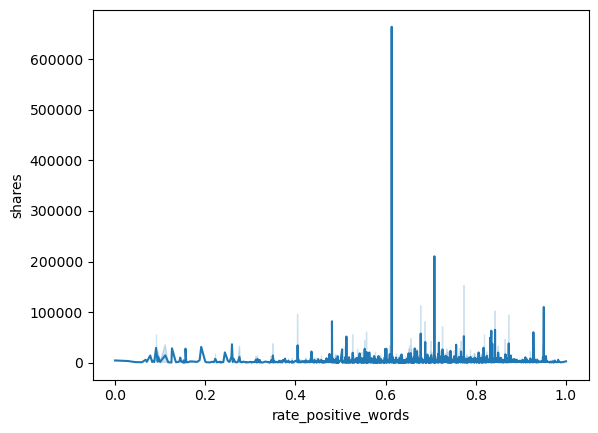

In [534]:
sns.lineplot(x='rate_positive_words', y='shares', data=df)
plt.show()

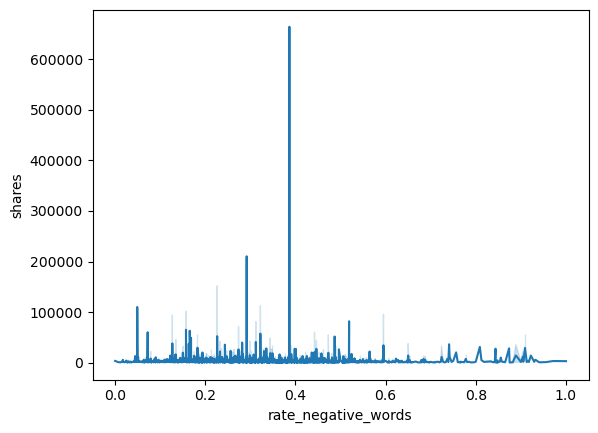

In [535]:
sns.lineplot(x='rate_negative_words', y='shares', data=df)
plt.show()

Here we can see that articles with a more positive sentiment are more likely to be shared online.

__global_subjectivity | num_hrefs | avg_negative_polarity | avg_positive_polarity | shares__

In [595]:
features = ["global_subjectivity", "num_hrefs", "avg_negative_polarity", "avg_positive_polarity", "shares"]
df[features].describe()

,global_subjectivity,num_hrefs,avg_negative_polarity,avg_positive_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.443370,10.883690,-0.259524,0.353825,3395.380184
std,0.116685,11.332017,0.127726,0.104542,11626.950749
min,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,0.396167,4.000000,-0.328383,0.306244,946.000000
50%,0.453457,8.000000,-0.253333,0.358755,1400.000000
75%,0.508333,14.000000,-0.186905,0.411428,2800.000000
max,1.000000,304.000000,0.000000,1.000000,843300.000000


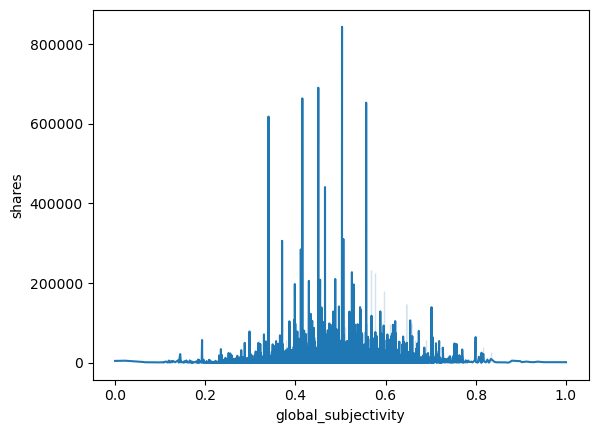

In [537]:
sns.lineplot(x='global_subjectivity', y='shares', data=df)
plt.show()

We can see that global_subjectivity follows a normal distribution. Also, we can observe that if the article has high subjectivity or low subjectivity, then it is less likely to be shared. There is a balance in between.

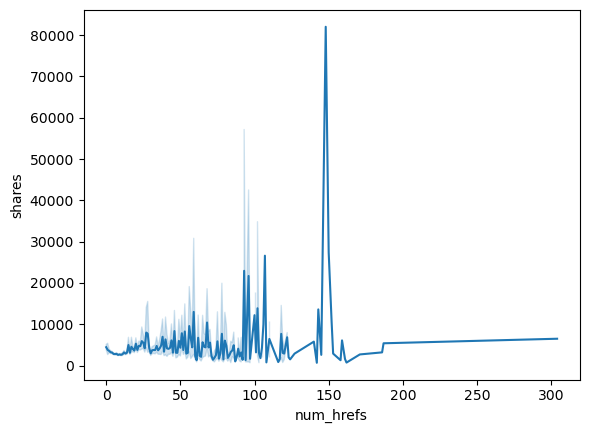

In [439]:
sns.lineplot(x='num_hrefs', y='shares', data=df)
plt.show()

A general trend can be seen where, with an increasing number of num_hrefs, the shares also increase.

In [596]:
df_corr = df[int_features]

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   n_tokens_title    39644 non-null  int64
 1   n_tokens_content  39644 non-null  int64
 2   num_hrefs         39644 non-null  int64
 3   num_self_hrefs    39644 non-null  int64
 4   num_imgs          39644 non-null  int64
 5   num_videos        39644 non-null  int64
 6   num_keywords      39644 non-null  int64
 7   shares            39644 non-null  int64
dtypes: int64(8)
memory usage: 2.4 MB


__Outliers & Boxplots__

In [597]:
df_new = df.copy()

In [598]:
def outliers_cntfix(data, flag): 
    lst_data=list(data)
    lst_data.sort()
    Q1, Q3=np.percentile(lst_data, [25, 75]) # 1st quartile, 3rd quartile
    IQR = Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    if flag == "cnt":
        cnt=0
        for x in lst_data:
            if x > upper_bound or x < lower_bound:
                cnt += 1  
        return cnt
    
    for i in range(len(lst_data)):
        if lst_data[i] > upper_bound:
            lst_data[i] = upper_bound      
        elif lst_data[i] < lower_bound:
            lst_data[i] = lower_bound
    
    
    return lst_data

In [599]:
cols = df_new.columns.drop(binary_features)

156 39644
% outliers:   0.3935021693068308


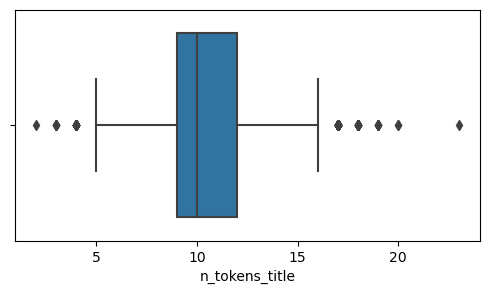

1933 39644
% outliers:   4.875895469680153


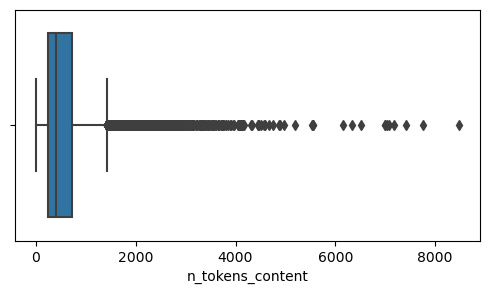

1604 39644
% outliers:   4.04600948441126


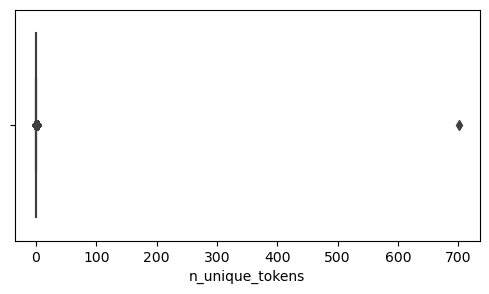

2827 39644
% outliers:   7.130965593784684


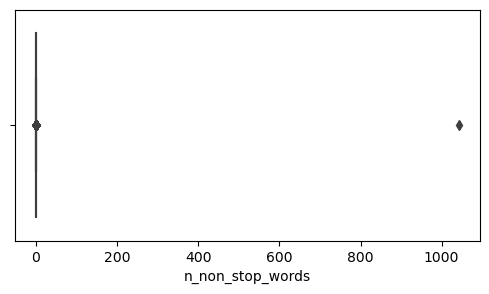

1733 39644
% outliers:   4.37140550903037


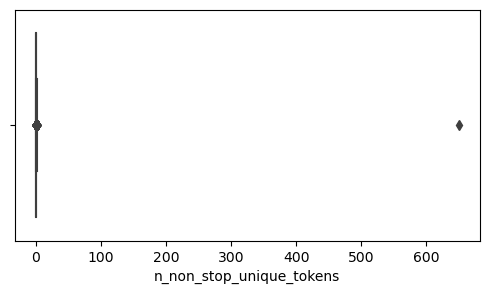

2169 39644
% outliers:   5.471193623246898


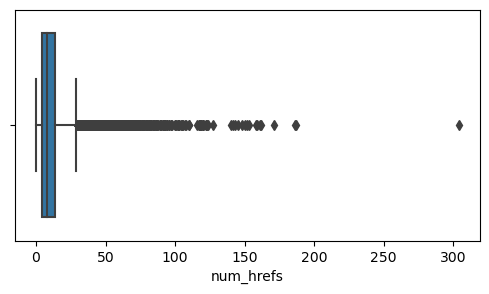

2090 39644
% outliers:   5.271920088790233


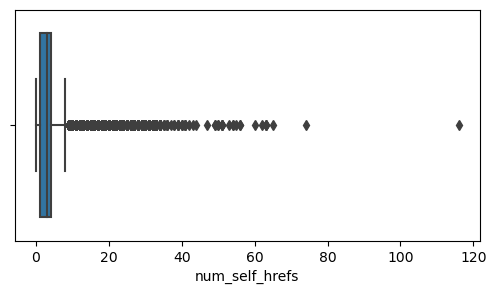

7703 39644
% outliers:   19.430430834426396


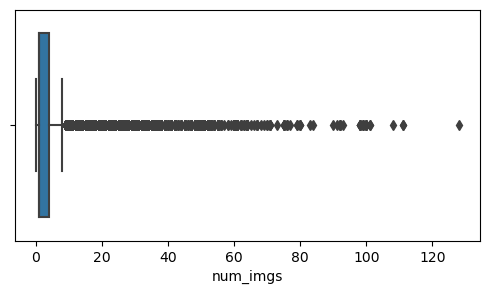

2946 39644
% outliers:   7.431137120371305


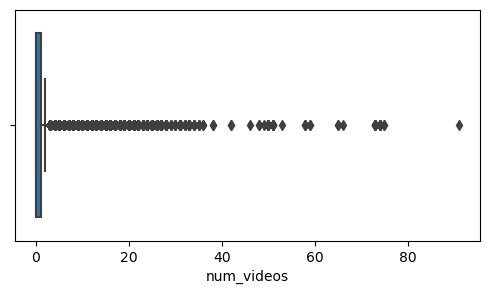

1681 39644
% outliers:   4.240238119261427


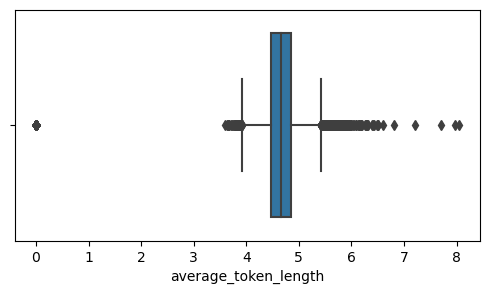

51 39644
% outliers:   0.1286449399656947


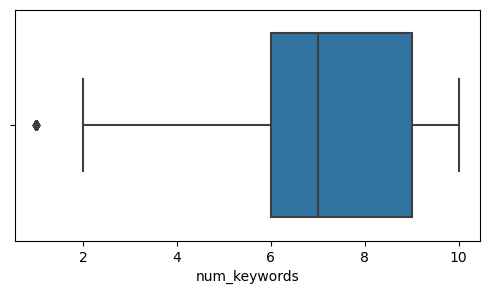

4677 39644
% outliers:   11.797497729795177


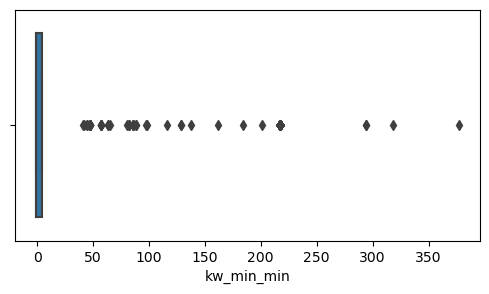

3661 39644
% outliers:   9.234688729694279


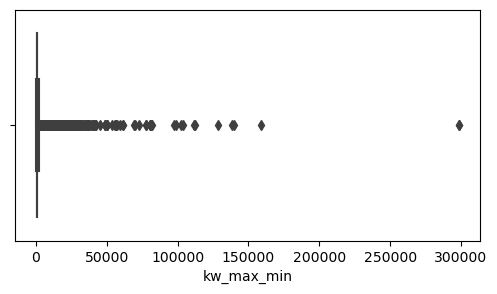

2081 39644
% outliers:   5.249218040560993


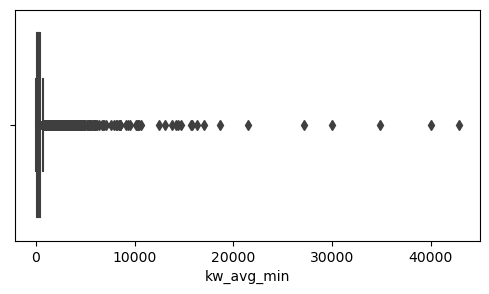

5063 39644
% outliers:   12.771163353849257


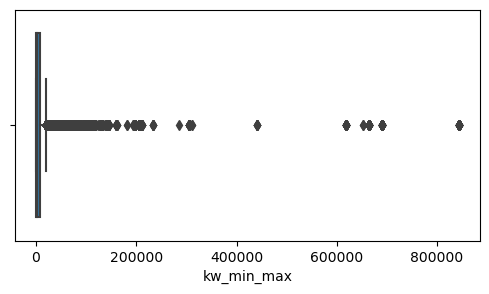

9440 39644
% outliers:   23.811926142669762


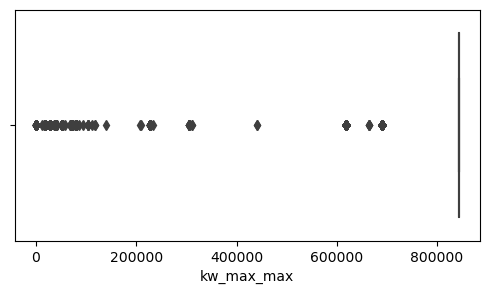

960 39644
% outliers:   2.4215518111189587


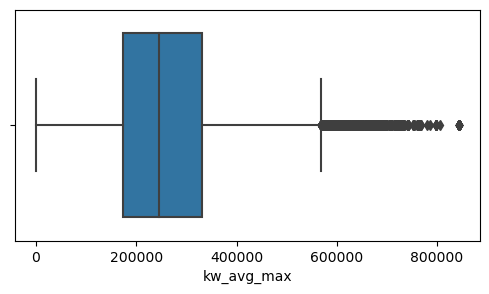

0 39644
% outliers:   0.0


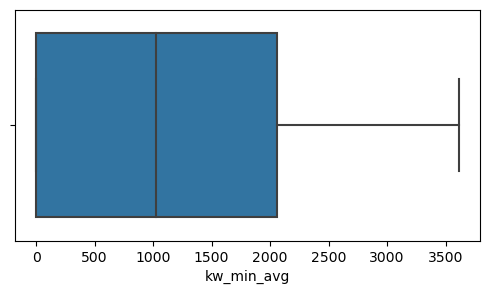

2391 39644
% outliers:   6.031177479568157


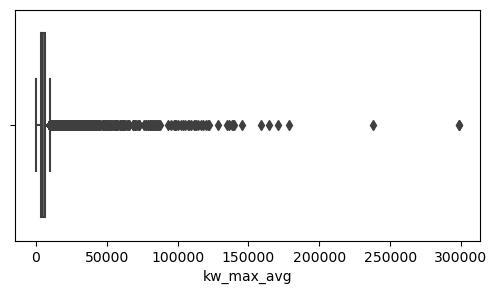

1629 39644
% outliers:   4.109070729492483


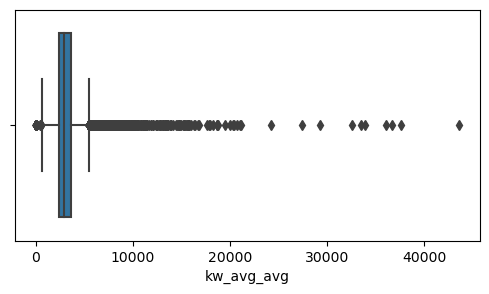

4976 39644
% outliers:   12.551710220966603


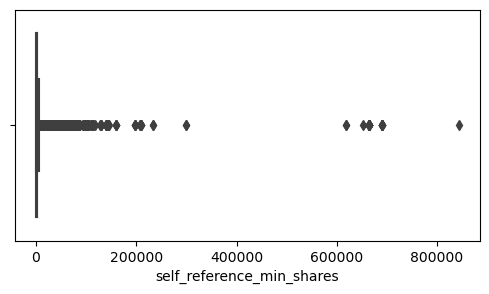

4183 39644
% outliers:   10.551407526990213


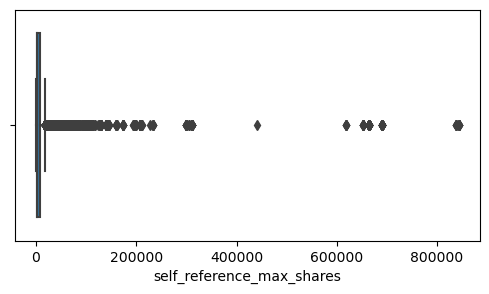

4209 39644
% outliers:   10.616991221874684


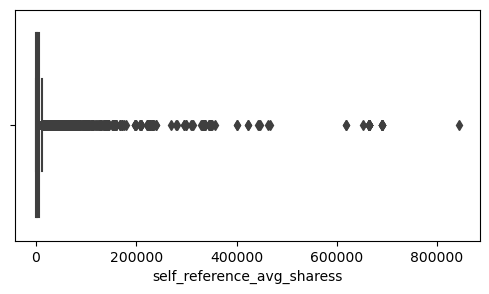

5282 39644
% outliers:   13.32357986076077


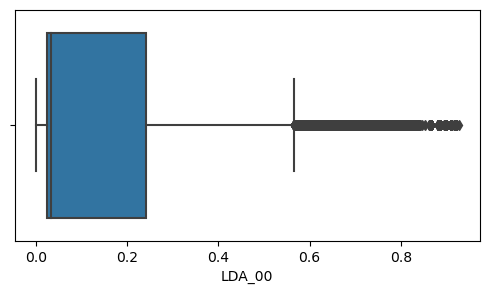

5834 39644
% outliers:   14.715972152154173


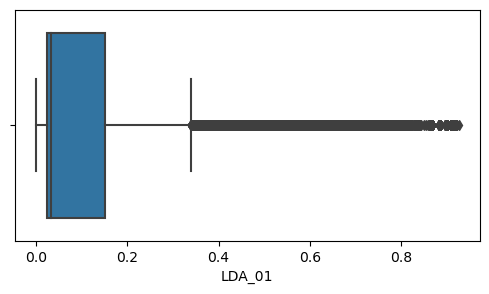

3541 39644
% outliers:   8.931994753304409


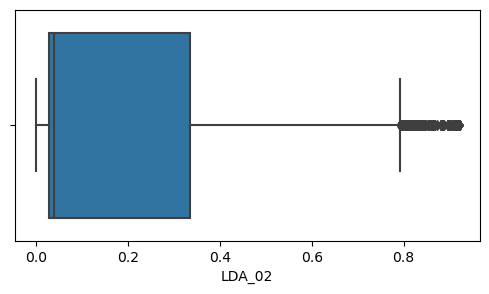

1075 39644
% outliers:   2.711633538492584


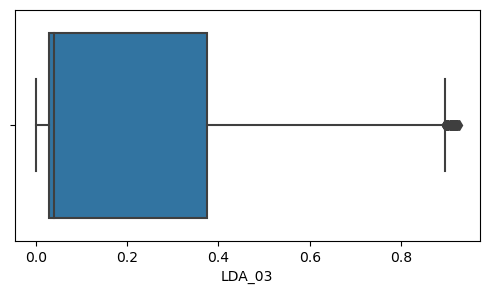

0 39644
% outliers:   0.0


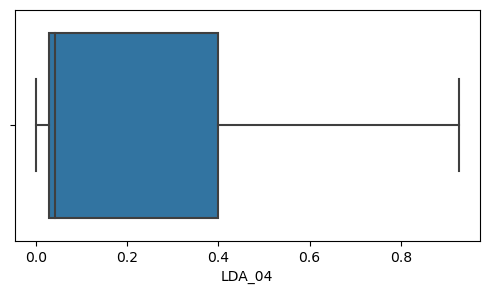

1912 39644
% outliers:   4.822924023811926


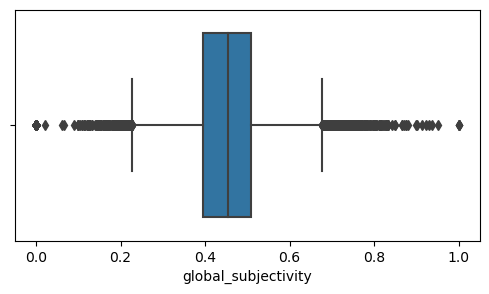

825 39644
% outliers:   2.081021087680355


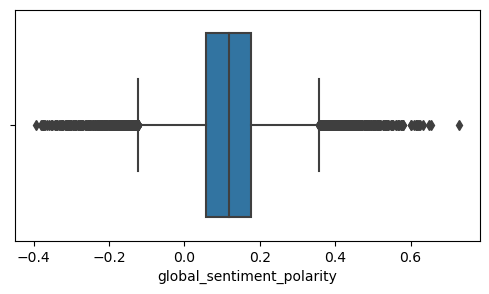

497 39644
% outliers:   1.2536575522147109


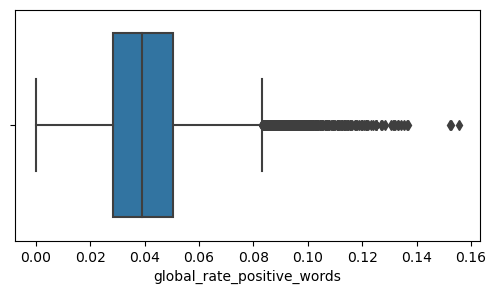

1324 39644
% outliers:   3.339723539501564


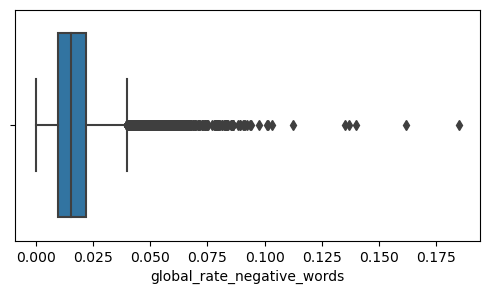

1594 39644
% outliers:   4.0207849863787715


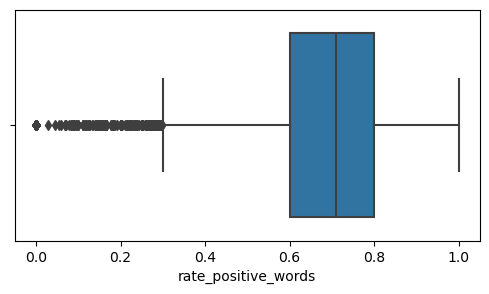

494 39644
% outliers:   1.246090202804964


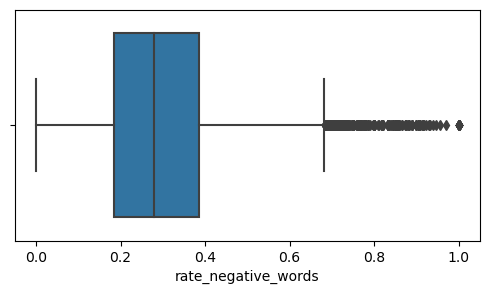

2095 39644
% outliers:   5.2845323378064775


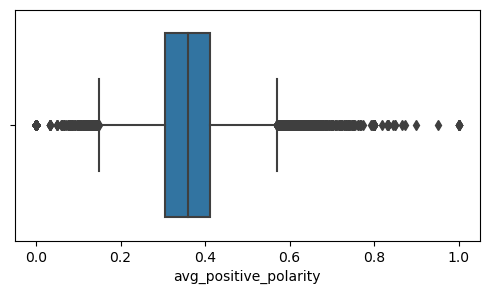

3147 39644
% outliers:   7.9381495308243375


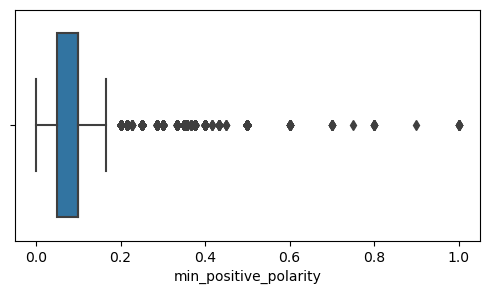

0 39644
% outliers:   0.0


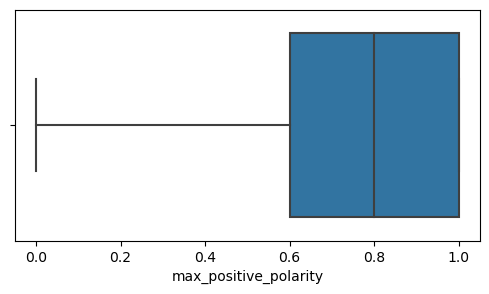

865 39644
% outliers:   2.181919079810312


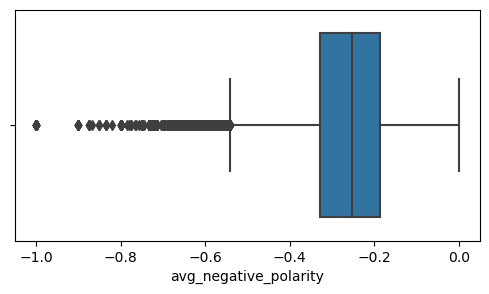

0 39644
% outliers:   0.0


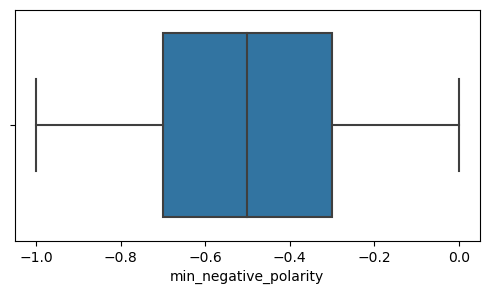

2454 39644
% outliers:   6.1900918171728385


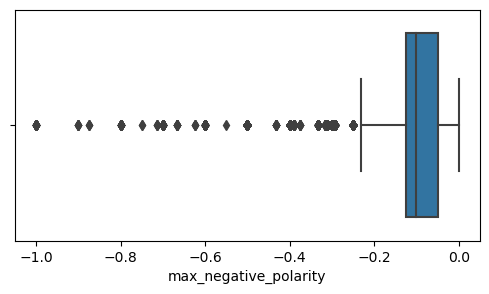

0 39644
% outliers:   0.0


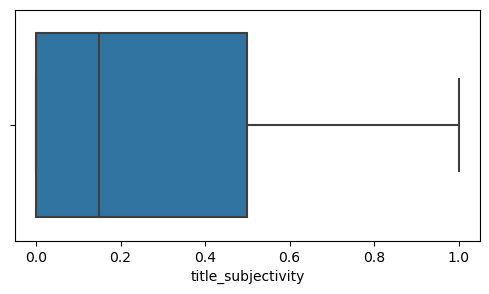

7592 39644
% outliers:   19.150438906265766


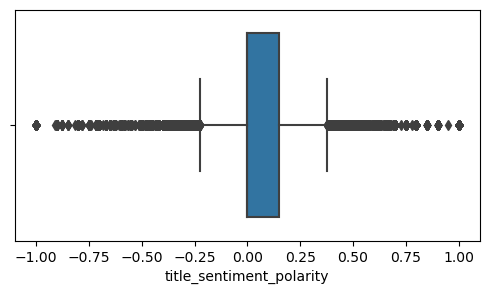

0 39644
% outliers:   0.0


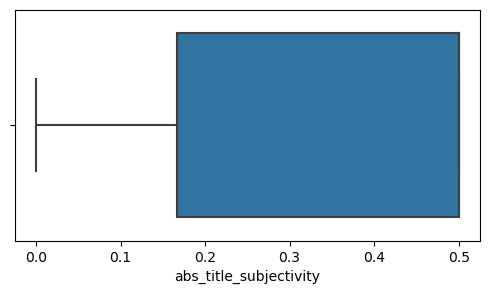

1655 39644
% outliers:   4.174654424376955


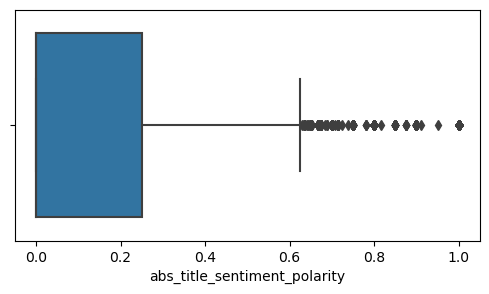

4541 39644
% outliers:   11.454444556553325


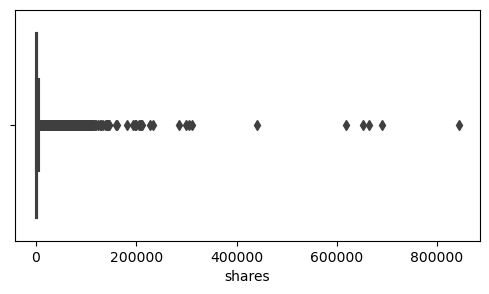

In [600]:
features_to_fix = []

for feature in cols:
    perc = (outliers_cntfix(df_new[feature], "cnt")/df_new[feature].count()) * 100
    print(outliers_cntfix(df_new[feature], "cnt"), df_new[feature].count())
    print("% outliers:  ", perc)
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_new[feature])
    plt.show()
    if perc >= 2 and feature != "shares":
        features_to_fix.append(feature)

We can see a significant percentage of outliers in the features, so let's fix them. I have chosen 2% as the threshold for fixing outliers.

In [601]:
for feature in features_to_fix:
    df_new[feature] = outliers_cntfix(df_new[feature], "fix")

In [602]:
lst_data=list(df_new["shares"])
lst_data.sort()
Q1, Q3=np.percentile(lst_data, [25, 75]) # 1st quartile, 3rd quartile
IQR = Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

df_new = df_new.drop(df_new[(df_new['shares'] > upper_bound) | (df_new['shares'] < lower_bound)].index)

In [603]:
df_new.shape

(35103, 59)

## Model Building, Training (Regression) & Hyperparameter Tuning

In [604]:
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [605]:
X = df_new.drop(columns=['shares']) 
y = df_new['shares']

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79)

### Ridge

In [607]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [608]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 782.09
Mean squared error 1089912.129946212
R2 score:  0.09231686778736226


In [553]:
# Create a Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solvers for optimization
}

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

In [554]:
# Evaluate the model on the test set
y_pred = best_ridge_model.predict(X_test)

print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 781.96
Mean squared error 1089670.026017766
R2 score:  0.09251849289644676


### Lasso

In [609]:
clf2 = Lasso(alpha=0.1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [610]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 783.54
Mean squared error 1094648.844345362
R2 score:  0.08837211330295325


In [611]:
# Create a Ridge Regression model
lasso_model = Lasso()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.005, 0.01, 0.1, 1.0],  # Regularization strength
    'max_iter': [100, 200, 300]       # Maximum number of iterations
}

# Perform GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_lasso_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test)

In [612]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 783.39
Mean squared error 1093098.2525598735
R2 score:  0.08966345227420114


### Random Forest

In [613]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as per your choice

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [614]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 799.86
Mean squared error 1104641.554009842
R2 score:  0.08005014517512421


In [ ]:
# Create a RandomForestRegressor model
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20],                # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

In [ ]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

### XGBoost

In [511]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor()

In [512]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_xg_reg = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xg_reg.predict(X_test)

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

In [515]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error: 789.78
Mean squared error 1121852.5834313673
R2 score:  0.06571673180655757


### LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with many advantages

In [617]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.015
params['boosting_type'] = 'gbdt'
# params['boosting_type'] = 'dart'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.99
params['num_leaves'] = 10
params['min_data'] = 100
params['max_depth'] = 10000
y_train=y_train.ravel()
reg= lgb.train(params, d_train, 100)
results=reg.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8071
[LightGBM] [Info] Number of data points in the train set: 28082, number of used features: 57
[LightGBM] [Info] Start training from score 1673.372374


In [619]:
score1 = mean_squared_error(y_test,results )
score2 = r2_score(y_test,results )
score3 = mean_absolute_error(y_test,results)
print('Mean absolute error: %.2f' % score3)
print("Mean squared error", score1)
print("R2 score: ", score2)

Mean absolute error: 791.81
Mean squared error 1098096.924590571
R2 score:  0.08550053843824701


In [620]:
estimator = lgb.LGBMRegressor(boosting_type= 'gbdt', metric='mse',objective='regression')

In [621]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.1, 0.5],
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 2000, num = 7)],
    'num_leaves' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)],
    'sub_feature' : [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 3)]
}
gbm = GridSearchCV(estimator, param_grid, cv=3)

In [622]:
gbm.fit(X_train, y_train)
print('Best parameters found by grid search are:', gbm.best_params_)

gbm_best = gbm.best_estimator_
results = gbm_best.predict(X_test)

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-thread

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-thread

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading,

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, 

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden 

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading,

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-thread

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-thread

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-thread

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsampl

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsam

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.55. Current value: feature_fraction=0.55
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1673.314727
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_by

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=1.0. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8061
[LightGBM] [Info] Number of data points in the train set: 18721, number of used features: 57
[LightGBM] [Info] Start training from score 1676.379841
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytr

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 18722, number of used features: 57
[LightGBM] [Info] Start training from score 1670.422711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.1. Current value: feature_fr

In [623]:
score1 = mean_squared_error(y_test,results )
score2 = r2_score(y_test,results )
score3 = mean_absolute_error(y_test,results)
print('Mean absolute error: %.2f' % score3)
print("Mean squared error", score1)
print("R2 score: ", score2)

Mean absolute error: 768.33
Mean squared error 1060186.8361643355
R2 score:  0.11707221000674484


__Before Hyperparameter Tuning__

In [4]:
dictn = {
    "Model":["Ridge", "Lasso", "Random Forest", "LightGBM"],
    "mae":[782, 783, 799, 791],
    "mse":[1089912, 1094648, 1104641, 1098096],
    "r2 score":[0.092, 0.088, 0.080, 0.085]
}

dff = pd.DataFrame(dictn)
dff = dff.set_index("Model")
dff

,mae,mse,r2 score
Model,,,
Ridge,782,1089912,0.092
Lasso,783,1094648,0.088
Random Forest,799,1104641,0.080
LightGBM,791,1098096,0.085


__After Hyperparameter Tuning__

In [6]:
dictn = {
    "Model":["Ridge", "Lasso", "XGBoost", "LightGBM"],
    "mae":[781, 783,789, 768],
    "mse":[1089670, 1093098, 1121852, 1060186],
    "r2 score":[0.092, 0.089, 0.065, 0.117]
}

dff = pd.DataFrame(dictn)
dff = dff.set_index("Model")
dff

,mae,mse,r2 score
Model,,,
Ridge,781,1089670,0.092
Lasso,783,1093098,0.089
XGBoost,789,1121852,0.065
LightGBM,768,1060186,0.117


## Classification

### K Means Clustering and Elbow Method 

In [562]:
X = df.copy()

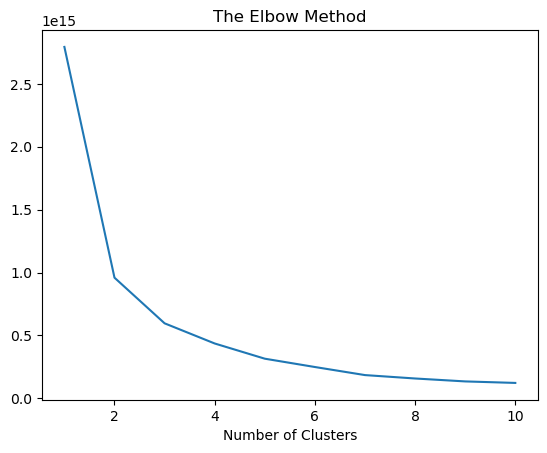

In [563]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

In [575]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [564]:
df_new = df.copy()

In [565]:
df_new['popularity'] = df_new['shares'].apply(lambda x: 0 if x < 1400 else 1)

In [566]:
df_new = df_new.drop(columns=["shares"])

In [567]:
df.shape

(39644, 59)

In [568]:
df_imb = df_new.copy()

In [569]:
popularity = df_imb["popularity"]
df_imb.drop(["popularity"], axis = 1, inplace = True)
df_imb["popularity"] = popularity
df_imb.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,False,True,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,True,False,False,False,False,False,False,False,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,False,False,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,False,False,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,True,False,False,False,False,False,False,False,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,False,True,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,False,False,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,True,False,False,False,False,False,False,False,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [571]:
# Load and summarize the dataset
from matplotlib import pyplot
from collections import Counter
from sklearn.preprocessing import LabelEncoder

Class = 0, n = 18490 (46.640%)
Class = 1, n = 21154 (53.360%)


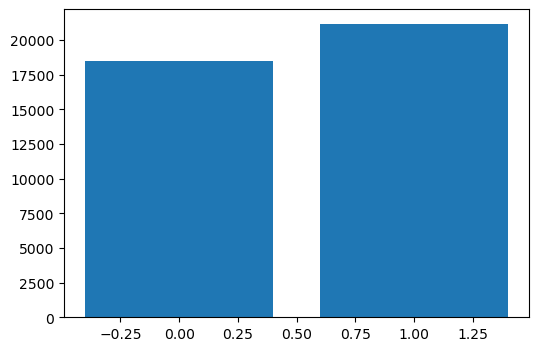

In [572]:
data = df_imb.to_numpy()

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print("Class = %d, n = %d (%.3f%%)" % (k, v, per))
    
# plot the distribution
plt.figure(figsize = (6,4))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [573]:
X_imb = df_imb.drop(["popularity"], axis = 1)
y_imb = df_imb["popularity"]

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgbclassif = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgbclassif.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgb_pred = xgbclassif.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dtc_accuracy)
print("Random Forest Accuracy:", rfc_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.5863286669189053
Decision Tree Accuracy: 0.579392104931265
Random Forest Accuracy: 0.6625047294740825
XGBoost Accuracy: 0.6579644343548997


In [577]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],    # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.3s
[CV] END max_depth=N

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.7s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] E

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3

In [578]:
# Evaluate the model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.6672972632109976
